### Score: 96.5

Q1.[4+10+10]

Q2.[9]

Q3.[5+5+5+5+5+4+5+5.5+5+4]

Q4.[5+5+5]

In [3]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline
import xarray as xr

In [52]:
#1.1 计算死亡总数
# Read the tsv file
Sig_Eqs = pd.read_csv(r"C:\Users\zjm\Desktop\ESE_5023\earthquakes-2024-10-23_13-55-19_+0800.tsv",sep='\t')

# Check information
#Sig_Eqs.info()
#Sig_Eqs.head()

#提取国家的名字
Sig_Eqs['Country'] = Sig_Eqs['Location Name'].str.split(':').str[0]
#分组算总数
Sig_Eqs_grouped = Sig_Eqs.groupby(['Country']).sum()
#去掉不相关列，输出国家及死亡总数
# NOTE: 应该读取Total Deaths列 -1
Sig_Eqs_grouped = Sig_Eqs_grouped[['Deaths']]
Sig_Eqs_grouped.sort_values('Deaths', ascending=False).head(20)

,Deaths
Country,
CHINA,2075947.0
TURKEY,1148745.0
IRAN,995410.0
ITALY,498418.0
SYRIA,369224.0
HAITI,323478.0
AZERBAIJAN,317219.0
JAPAN,278607.0
ARMENIA,191890.0


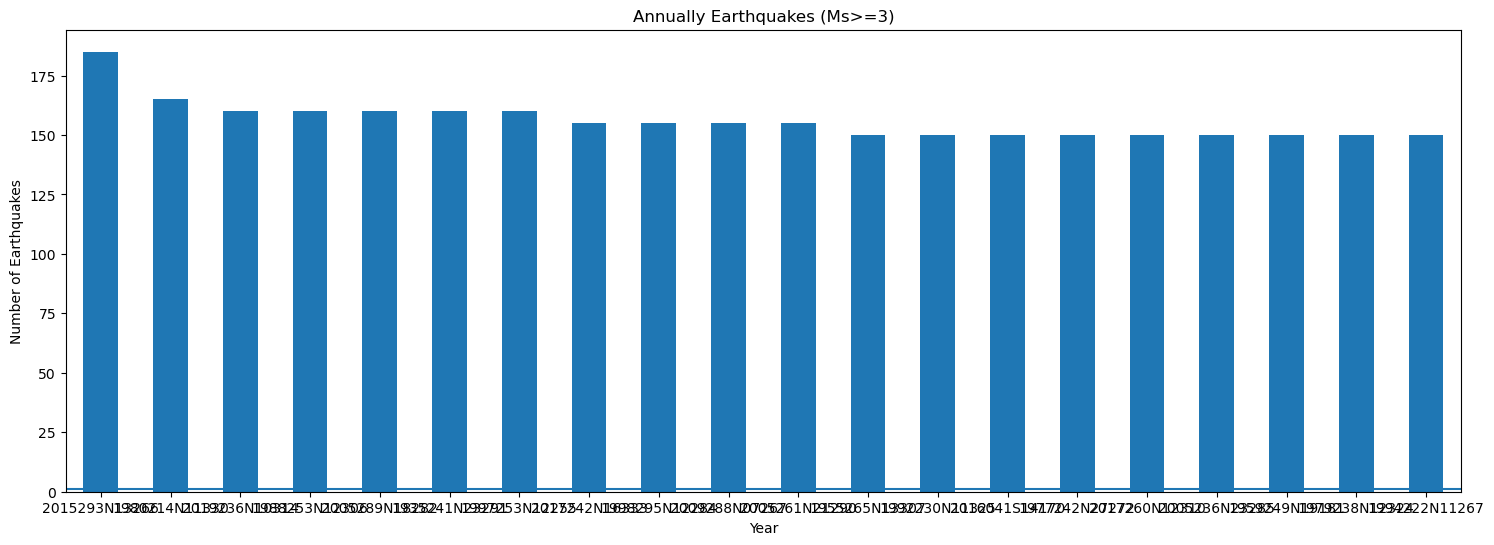

In [53]:
#1.2  Compute the total number of earthquakes with magnitude larger than 3.0
#筛选
Sig_Eqs_large = Sig_Eqs.loc[(Sig_Eqs['Mag'] >= 3)]

#分组并计数
Sig_Eqs_counts = Sig_Eqs_large.groupby(['Year']).size()

#作图
Sig_Eqs_counts.plot(kind='line',figsize=(18, 6))
plt.title('Annually Earthquakes (Ms>=3)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()

图中的前端出现了一条偶有波动的长实线，推测这是由于早年间没有成熟的地震监测技术，发生过的地震得不到良好的记录。
图中的后端出现了明显的升高，最高值达到80左右，推测原因有二，一是随着技术的进步，地震逐渐被检测并记录；二是地壳运动增强，导致其数量呈上升趋势。

In [54]:
#1.3 Write a function CountEq_LargestEq
#定义功能
def CountEq_LargestEq(country):
    Sig_Eqs = pd.read_csv(r"C:\Users\zjm\Desktop\ESE_5023\earthquakes-2024-10-23_13-55-19_+0800.tsv",sep='\t')
    
    #识别国家，地区，根据国家分组
    Sig_Eqs['Country'] = Sig_Eqs['Location Name'].str.split(':').str[0]
    Sig_Eqs['Location'] = Sig_Eqs['Location Name'].str.split(':').str[1]
    Sig_Eqs_country = Sig_Eqs.groupby(['Country']).size()

    #保证输入能被识别
    COUNTRY = country.upper()
    #识别不了就输出0
    total_eq = Sig_Eqs_country.get(COUNTRY, 0)
    
    #本来想输出一句话的，但后面要计算数据
    #print(f"The total number of earthquakes since 2150 B.C. in {COUNTRY} is {total_eq}")

    #提取数字
    Sig_Eqs_set = Sig_Eqs.loc[(Sig_Eqs['Country'] == COUNTRY)]
    #排序
    Sig_Eqs_set.sort_values('Mag', ascending=False)

    #提取日期
    year = int(Sig_Eqs_set.iloc[0].get('Year'))  
    month = Sig_Eqs_set.iloc[0].get('Month')
    day = Sig_Eqs_set.iloc[0].get('Day')
    Date_str = f"{year}"
    if month is not None:
        Date_str += f"-{month:02d}" 
    if day is not None:
        Date_str += f"-{day:02d}"
    #print(f"The date of the largest earthquake ever happened in {COUNTRY} is {Date_str}")

    #提取地点
    Loc_str = Sig_Eqs_set.iloc[0]['Location']
    #print(f"The location of the largest earthquake ever happened in {COUNTRY} is{Loc_str}")

    #输出
    return(COUNTRY,total_eq,Date_str,Loc_str)

#测试
#print(CountEq_LargestEq("Turkey"))

#读表格，读国家，建一个空list
Sig_Eqs = pd.read_csv(r"C:\Users\zjm\Desktop\ESE_5023\earthquakes-2024-10-23_13-55-19_+0800.tsv",sep='\t')
Sig_Eqs['Country'] = Sig_Eqs['Location Name'].str.split(':').str[0]
Sig_Eqs_country = Sig_Eqs.groupby(['Country']).size()
results_list = []

#用了循环从索引里找国家
for country in Sig_Eqs_country.index:
    result = CountEq_LargestEq(country)
    results_list.append(result)
#print(results_list)

#转化成df，排序
results_df = pd.DataFrame(results_list, columns=['Country', 'Total Earthquakes', 'Date', 'Location'])
results_df = results_df.sort_values('Total Earthquakes', ascending=False)
print(results_df)

                            Country  Total Earthquakes   Date  \
58                            CHINA                623   -193   
136                       INDONESIA                395   1629   
140                            IRAN                386   -400   
152                           JAPAN                359    684   
148                           ITALY                332  -1450   
..                              ...                ...    ...   
117                          GUINEA                  1   1983   
234         PAKISTAN-NW AFGHANISTAN                  1   1984   
235                 PAKISTAN; INDIA                  1   2009   
115  GUAM; NORTHERN MARIANA ISLANDS                  1   1825   
349                          ZAMBIA                  1   2017   

              Location  
58      GANSU PROVINCE  
136          BANDA SEA  
140    REY,EIVAN-E-KAY  
152                NaN  
148       LACUS CIMINI  
..                 ...  
117     GAOUAL-KOUMBIA  
234         HINDU K

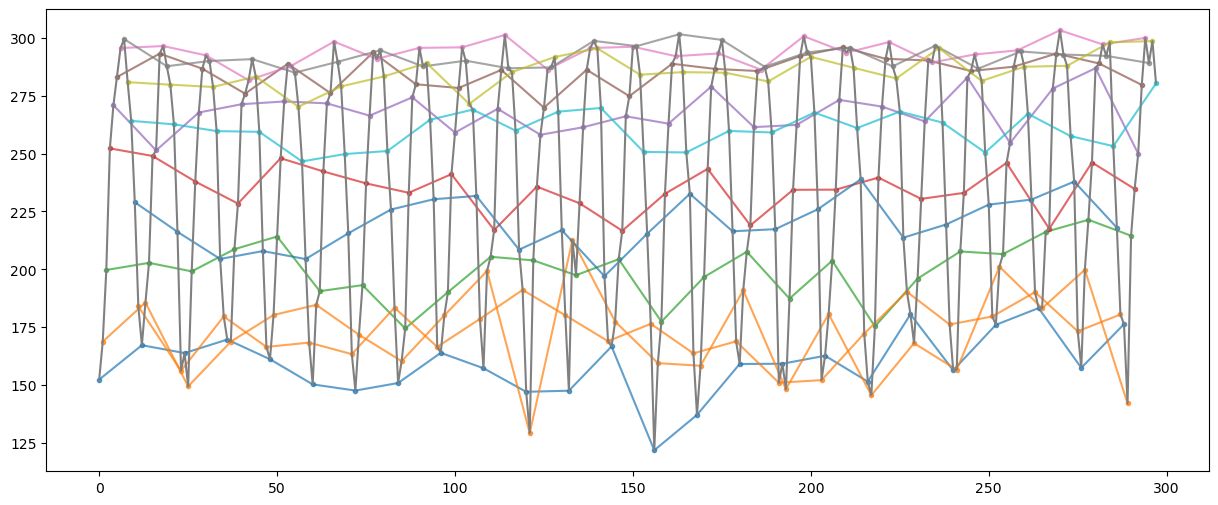

In [55]:
# 2 Air temperature in Shenzhen
#设定筛选条件
strict = True

#读文件，把数据分成温度和质量
Baoan_TMP = pd.read_csv(r"C:\Users\zjm\Desktop\ESE_5023\Baoan_Weather_1998_2022.csv", usecols=['DATE', 'TMP'])
Baoan_TMP['QUA'] = Baoan_TMP['TMP'].str.split(',').str[1]
Baoan_TMP['TMP'] = Baoan_TMP['TMP'].str.split(',').str[0]

#根据筛选条件决定是否保留部分存疑数据
# NOTE: 温度没有除以10 -1
if strict:
    Baoan_TMP = Baoan_TMP.loc[ (Baoan_TMP['TMP'] != '+9999') & ((Baoan_TMP['QUA'] == '1') | (Baoan_TMP['QUA'] == '5'))]
else:
    Baoan_TMP = Baoan_TMP.loc[ (Baoan_TMP['TMP'] != '+9999') & ((Baoan_TMP['QUA'] == '0') | (Baoan_TMP['QUA'] == '1') | 
                                                                (Baoan_TMP['QUA'] == '5') | (Baoan_TMP['QUA'] == '9') | 
                                                                (Baoan_TMP['QUA'] == 'A') | (Baoan_TMP['QUA'] == 'C'))]
#把日期列分成容易读取的形式
Baoan_TMP['TIME'] = Baoan_TMP['DATE'].str.split('T').str[1]
Baoan_TMP['DATE'] = Baoan_TMP['DATE'].str.split('T').str[0]
Baoan_TMP['DAY'] = Baoan_TMP['DATE'].str.split('-').str[2]
Baoan_TMP['MON'] = Baoan_TMP['DATE'].str.split('-').str[1]
Baoan_TMP['YEAR'] = Baoan_TMP['DATE'].str.split('-').str[0]

#把各列转化一下格式
Baoan_TMP['TMP'] = pd.to_numeric(Baoan_TMP['TMP'])
Baoan_TMP['DAY'] = pd.to_numeric(Baoan_TMP['DAY'])
Baoan_TMP['MON'] = pd.to_numeric(Baoan_TMP['MON'])
Baoan_TMP['YEAR'] = pd.to_numeric(Baoan_TMP['YEAR'])

#分组计算平均值
Baoan_TMP_Mean = Baoan_TMP.groupby(['YEAR','MON'])['TMP'].mean().reset_index()

#转换待会x轴要用的数据（但后面生成图片的时候用的还是原来的index，没研究明白）
Baoan_TMP_Mean['DATE'] = Baoan_TMP_Mean['YEAR'].astype(str) + '-' + Baoan_TMP_Mean['MON'].astype(str)
Baoan_TMP_Mean['date_column'] = pd.to_datetime(Baoan_TMP_Mean['DATE'], format='%Y-%m')

#表示出不同年份相同月的变化趋势
# NOTE: x='date_column'在这里是无效的，.plot()会自动将索引置为x轴 -1
Baoan_TMP_Mean.groupby(['MON'])['TMP'].plot(x='date_column',alpha=0.7,markersize=3, marker='o',figsize=(15, 6))
#表示出月份的变化趋势
Baoan_TMP_Mean['TMP'].plot(x='date_column',kind='line',color = 'grey',figsize=(15, 6))
plt.show()
#Baoan_TMP_Mean.head()

从灰线，也就是所有数据之间的连线可以看出，温度的变化呈现出在一年之内先上升后下降的趋势。
从其它颜色线，也就是各年份之间的相同月份数据之间的连线可以看出，各年间相同月份温度变化没有明显规律，相对杂乱，但大多在一个2度左右的区间范围内变化。

In [4]:
#3.1 生成最强的十个飓风
#读文件
Storms = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 # NOTE: 第二行是数据，不能跳过 -1
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'],
                 dtype={'NAME': str})

#转换一下风速列的格式
Storms['WMO_WIND'] = pd.to_numeric(Storms['WMO_WIND'], errors='coerce')

#去掉空值行
Storms_Speed = Storms.dropna(subset=['WMO_WIND'])
#Storms_Speed.head()

#分组，提取最大风速（之前试了一下平均值，怪怪的，还是用max吧）
Storms_SID_Speed = Storms_Speed.groupby(['SID'])['WMO_WIND'].max()
Storms_SID_Speed_Largest = Storms_SID_Speed.sort_values(ascending=False).head(10).reset_index()
print(Storms_SID_Speed_Largest)

# 输出结果
Name_of_Largest_Storms = []
for sid in Storms_SID_Speed_Largest['SID']:
    name = Storms.loc[Storms['SID'] == sid, 'NAME'].iloc[0]
    Name_of_Largest_Storms.append(name)
print(Name_of_Largest_Storms)

             SID  WMO_WIND
0  2015293N13266     185.0
1  1980214N11330     165.0
2  2019236N10314     160.0
3  1988253N12306     160.0
4  2005289N18282     160.0
5  1935241N23291     160.0
6  1997253N12255     160.0
7  2017242N16333     155.0
8  1998295N12284     155.0
9  2009288N07267     155.0
['PATRICIA', 'ALLEN', 'DORIAN', 'GILBERT', 'WILMA', nan, 'LINDA', 'IRMA', 'MITCH', 'RICK']


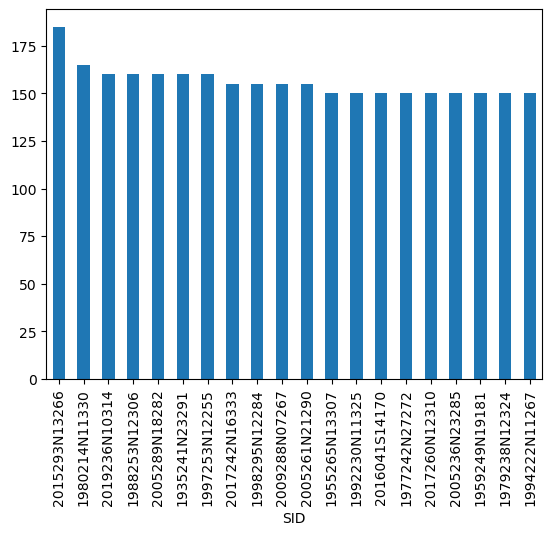

In [6]:
#3.2 飓风TOP20条形图
#把有编号没名字的飓风也保留了下来，毕竟有编号
Storms_SID_Speed_Largest = Storms_SID_Speed.sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

BASIN
EP     62412
NI     55401
SA       119
SI    160668
SP     67119
WP    236576
dtype: int64


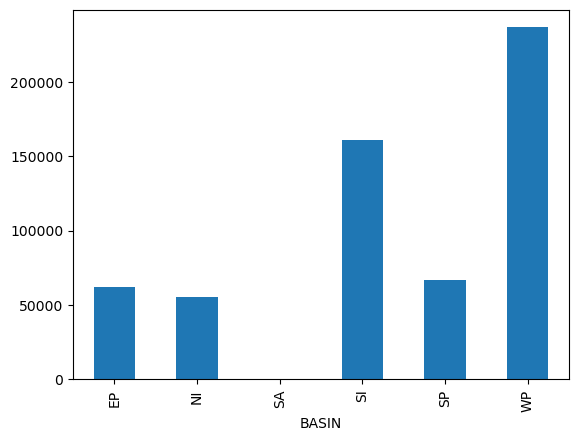

In [9]:
#3.3 生成不同流域数据点的数量
#读文件，这次只需要编号，名字和流域
Storms = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=['SID','NAME','BASIN'],
                 skiprows=[1, 2], 
                 #parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'],
                 dtype={'NAME': str})
#Storms.head()

#去掉流域不明的
Storms_Basein = Storms.loc[(Storms['BASIN'] != 'MM')]

#分组，计数
Storms_Basein_counts = Storms_Basein.groupby(['BASIN']).size()
print(Storms_Basein_counts)
Storms_Basein_counts.plot(kind='bar')
plt.show()

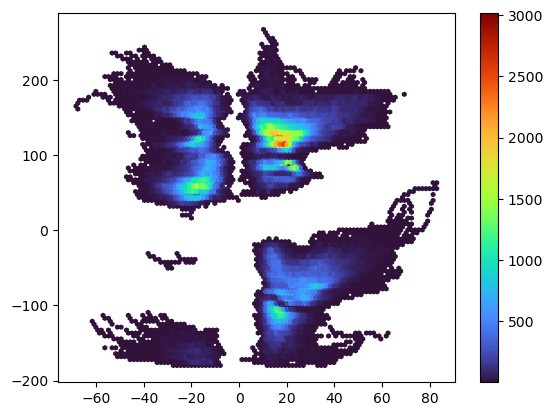

In [10]:
#3.4 生成六边形图
#读文件，这次只要编号和经纬度
Storms = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=['SID','LAT','LON'],
                 skiprows=[1, 2], 
                 #parse_dates=['ISO_TIME'],
                 #na_values=['NOT_NAMED', 'NAME'],
                 #dtype={'NAME': str}
                    )
#画图，试了一下，这样搭配看着清楚一点
hb = plt.hexbin(Storms['LAT'], Storms['LON'], gridsize=100, mincnt=1, cmap='turbo')
cb = plt.colorbar(hb)
plt.show()

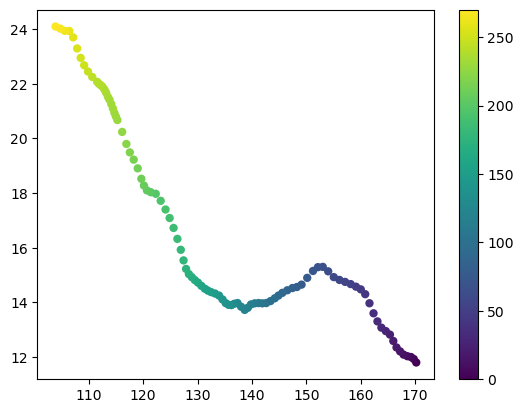

In [11]:
#3.5 18年山竹轨迹图
#读文件
Storms = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=['ISO_TIME','NAME','LAT','LON','WMO_WIND'],
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'],
                 dtype={'NAME': str}
                    )

#筛出符合条件的山竹，排除掉其他年份的
Storms_Mangkhut = Storms.loc[(Storms['NAME'] == 'MANGKHUT') & (Storms['ISO_TIME'].dt.year == 2018)].copy()

#生成一列表示台风生成时间
first_time = Storms_Mangkhut['ISO_TIME'].iloc[0]
Storms_Mangkhut.loc[:,'duration'] = (Storms_Mangkhut['ISO_TIME'] - first_time).dt.total_seconds() / 3600

#生成散点图，通过颜色变化看台风方向
scatter = plt.scatter(Storms_Mangkhut['LON'], Storms_Mangkhut['LAT'], c=Storms_Mangkhut['duration'], cmap='viridis', edgecolor='none')
cb = plt.colorbar(scatter)
plt.show()

In [12]:
#3.6 保留特定流域数据
#读文件
Storms_3_6 = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'],
                 dtype={'NAME': str})

#根据要求筛数据
# NOTE: 是筛选出在WP和EP的数据 -1
# Storms_WEP = Storms_3_6.loc[((Storms_3_6['BASIN'] == 'WP') | (Storms_3_6['BASIN'] == 'WP')) & (Storms_3_6['ISO_TIME'].dt.year >= 1970)].copy()
Storms_WEP = Storms_3_6.loc[((Storms_3_6['BASIN'] == 'WP') | (Storms_3_6['BASIN'] == 'EP')) & (Storms_3_6['ISO_TIME'].dt.year >= 1970)].copy()
print(Storms_WEP)

                  SID  SEASON  NUMBER BASIN SUBBASIN   NAME  \
350393  1970050N07151    1970      22    WP       MM  NANCY   
350394  1970050N07151    1970      22    WP       MM  NANCY   
350395  1970050N07151    1970      22    WP       MM  NANCY   
350396  1970050N07151    1970      22    WP       MM  NANCY   
350397  1970050N07151    1970      22    WP       MM  NANCY   
...               ...     ...     ...   ...      ...    ...   
707084  2022275N10316    2022      76    EP       MM  JULIA   
707085  2022275N10316    2022      76    EP       MM  JULIA   
707173  2022286N15151    2022      80    WP       MM    NaN   
707174  2022286N15151    2022      80    WP       MM    NaN   
707175  2022286N15151    2022      80    WP       MM    NaN   

                  ISO_TIME NATURE       LAT      LON WMO_WIND WMO_PRES  \
350393 1970-02-19 00:00:00     TS   7.00000  151.400              1006   
350394 1970-02-19 03:00:00     TS   7.24752  151.205                     
350395 1970-02-19 06:

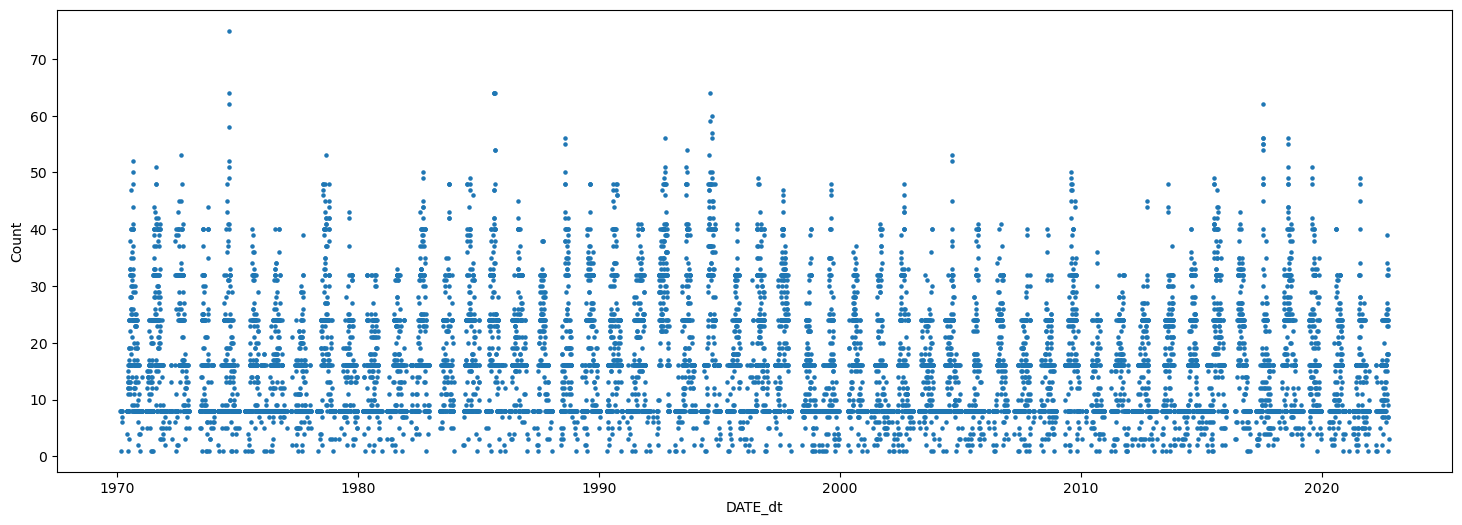

In [15]:
#3.7 计数并作图
Storms_WEP.loc[:, 'YEAR'] = Storms_WEP['ISO_TIME'].dt.year
Storms_WEP.loc[:, 'MON'] = Storms_WEP['ISO_TIME'].dt.month
Storms_WEP.loc[:, 'DAY'] = Storms_WEP['ISO_TIME'].dt.day
#print(Storms_WEP)

#分组，计数
Storms_WEP_DAY_counts = Storms_WEP.groupby(['YEAR', 'MON', 'DAY']).size().reset_index().copy()
#print(Storms_WEP_DAY_counts)

#整理格式
Storms_WEP_DAY_counts.loc[:, 'DATE'] = Storms_WEP_DAY_counts['YEAR'].astype(str) + '-' + Storms_WEP_DAY_counts['MON'].astype(str) + '-' + Storms_WEP_DAY_counts['DAY'].astype(str)
Storms_WEP_DAY_counts.rename(columns={0: 'Count'}, inplace=True)
#print(Storms_WEP_DAY_counts)
Storms_WEP_DAY_counts.loc[:, 'DATE_dt'] = pd.to_datetime(Storms_WEP_DAY_counts['DATE'])

#画图
Storms_WEP_DAY_counts.plot(kind='scatter', x='DATE_dt',y='Count',s = 5,figsize=(18, 6))
plt.show()

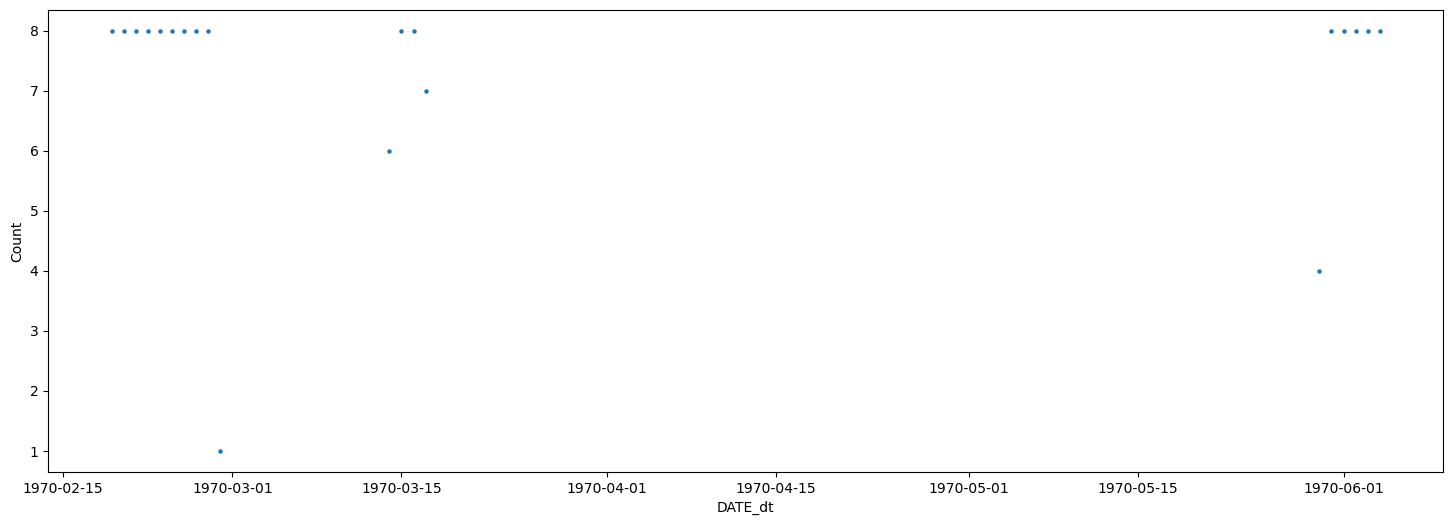

In [18]:
#试一下日期之间的点是否连续
Storms_WEP_DAY_counts.head(20).plot(kind='scatter', x='DATE_dt',y='Count',s = 5,figsize=(18, 6))
plt.show()

从这里可以发现，日期并不连续，而没有数据点记录的日期对应的计数点是“无”，但在实际情况中，没有数据点记录的日期对应的计数点还存在为“0”的可能.

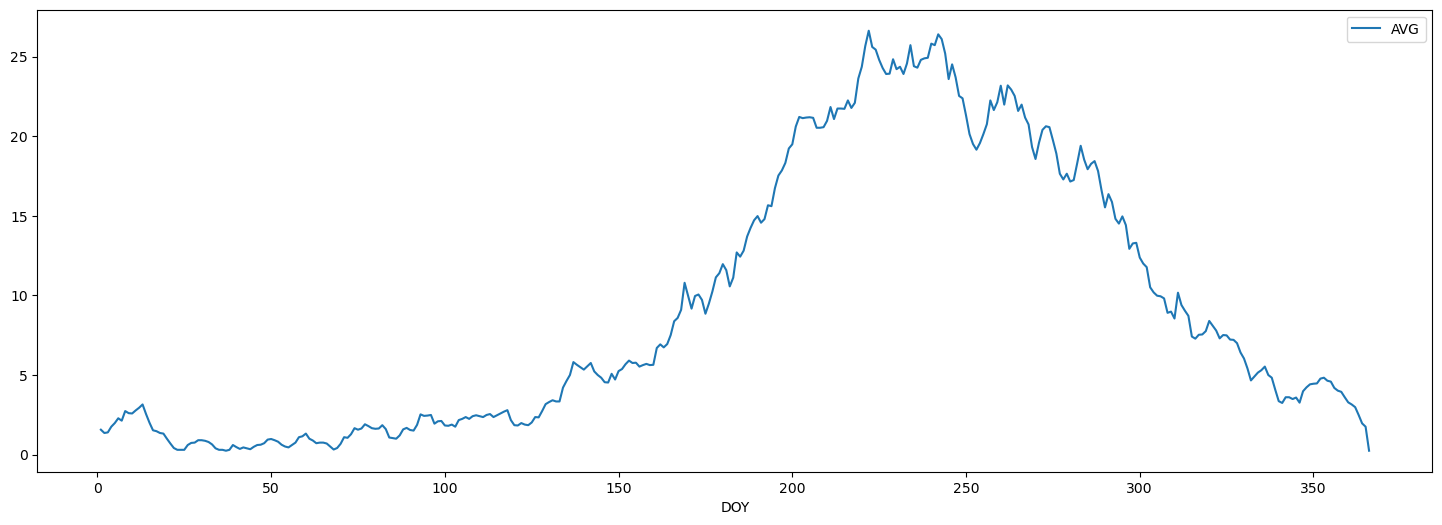

In [20]:
#3.8 年积日计算及作图
#生成年积日
Storms_WEP_DAY_counts.loc[:, 'DOY'] = Storms_WEP_DAY_counts['DATE_dt'].dt.dayofyear
#print(Storms_WEP_DAY_counts)

#试一下看看同一个年积日有几年有数据
#test = Storms_WEP_DAY_counts.loc[Storms_WEP_DAY_counts['DOY'] == 56]
#print(test)

#分组，计算计数点总和再求平均，作图
Storms_WEP_DOY_counts_avg = Storms_WEP_DAY_counts.groupby('DOY')['Count'].sum().reset_index().copy()
Storms_WEP_DOY_counts_avg.loc[:, 'AVG'] = Storms_WEP_DOY_counts_avg['Count']/(2022-1970+1)
#print(Storms_WEP_DOY_counts)
Storms_WEP_DOY_counts_avg.plot(kind='line',x='DOY',y='AVG',figsize=(18, 6))
plt.show()

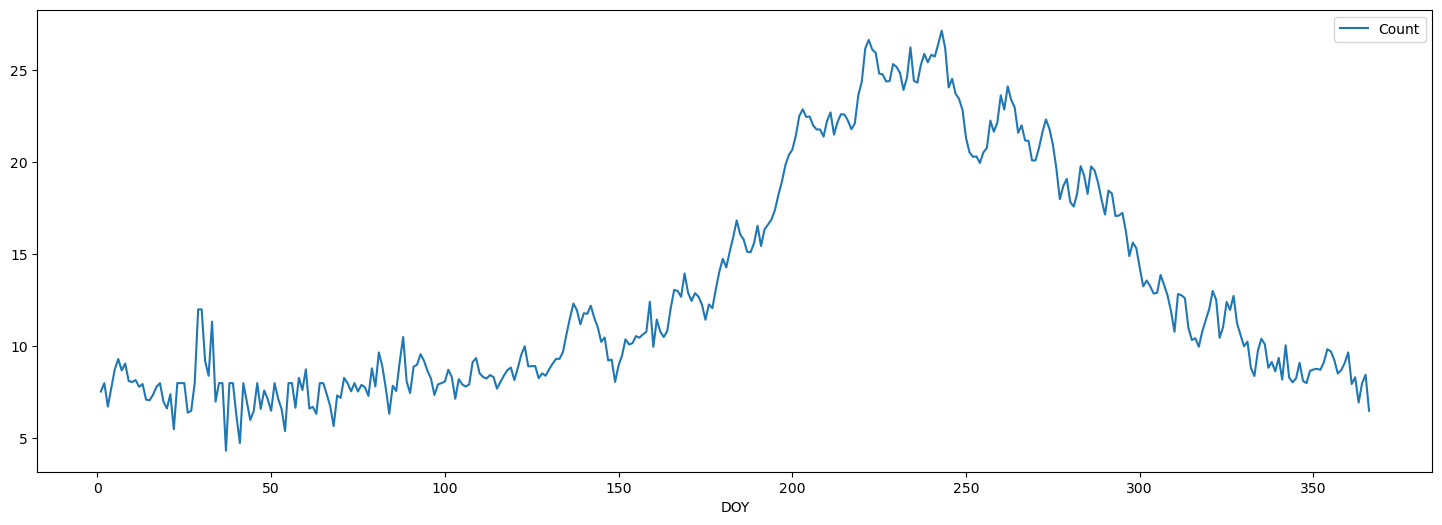

In [21]:
#直接分组求平均，作图
Storms_WEP_DOY_counts_mean = Storms_WEP_DAY_counts.groupby('DOY')['Count'].mean().reset_index().copy()
Storms_WEP_DOY_counts_mean.plot(kind='line',x='DOY',y='Count',figsize=(18, 6))
plt.show()

因为上一个发现，在这里做了两种计算。第一种计算对应的是数据点为“0”的情况，先计算了同一年积日记录的所有数据点总和，再除以年份之间的差值，也就是说，如果10年里面有3年的1月1号分别记录了8个数据点，那么年积日为1对应计算出来的平均数为2.4。第二种计算对应的是数据点为“无”的情况，也就是说，如果10年里面有3年的1月1号分别记录了8个数据点，那么年积日为1对应计算出来的平均数为8。
观察两张图片可以发现，第二张图片的波动更杂乱，尤其是年积日为30到年积日为50时，出现了明显的峰段；而第一张图片的虽然也有波动，但基本反映出了该流域的飓风季集中在一年中的下半年这一现象，而年积日为30到年积日为50时，并没有像第二张图里面那样明显的峰段。
综上考虑，在这次作业中，没有数据点记录的日期对应的计数点被考虑为“0”.

       YEAR  MON  DAY  Count        DATE    DATE_dt  DOY        AVG    Anomaly
0      1970    2   19      8   1970-2-19 1970-02-19   50   0.981132   7.018868
1      1970    2   20      8   1970-2-20 1970-02-20   51   0.905660   7.094340
2      1970    2   21      8   1970-2-21 1970-02-21   52   0.811321   7.188679
3      1970    2   22      8   1970-2-22 1970-02-22   53   0.622642   7.377358
4      1970    2   23      8   1970-2-23 1970-02-23   54   0.509434   7.490566
...     ...  ...  ...    ...         ...        ...  ...        ...        ...
10812  2022   10    4      9   2022-10-4 2022-10-04  277  17.641509  -8.641509
10813  2022   10    5      7   2022-10-5 2022-10-05  278  17.283019 -10.283019
10814  2022   10    9      1   2022-10-9 2022-10-09  282  18.301887 -17.301887
10815  2022   10   10      7  2022-10-10 2022-10-10  283  19.396226 -12.396226
10816  2022   10   12      3  2022-10-12 2022-10-12  285  17.924528 -14.924528

[10817 rows x 9 columns]


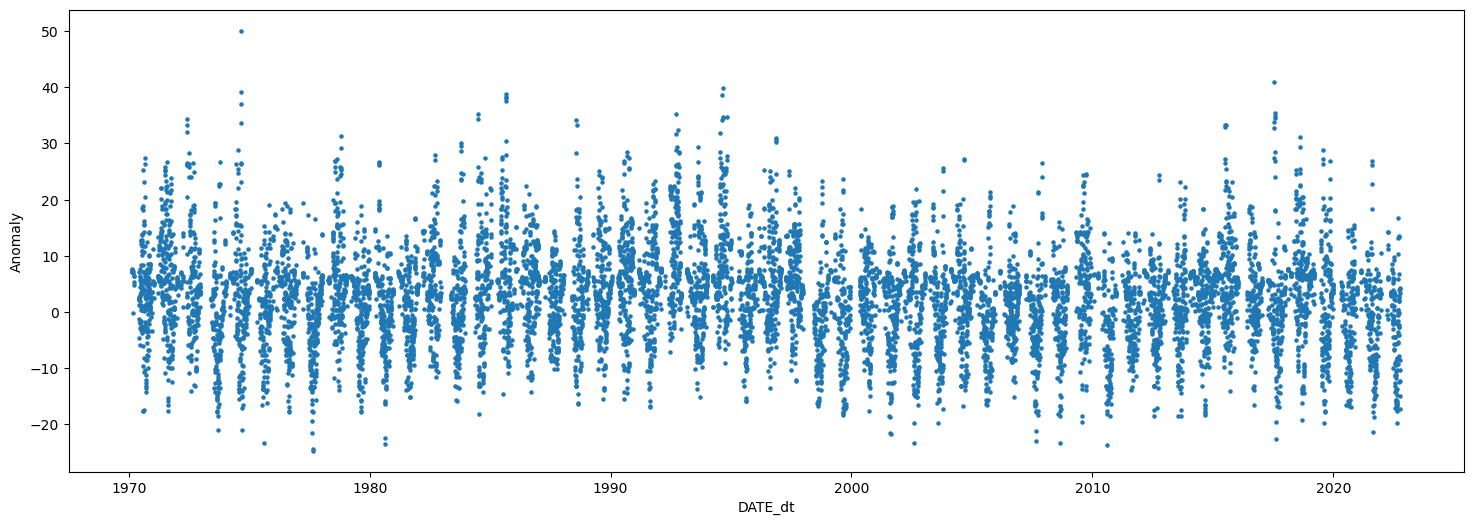

In [22]:
#3.9 计算差值，作图

#检查数据
#print(Storms_WEP_DAY_counts)
#print(Storms_WEP_DOY_counts_avg)

#合并表格，根据年积日匹配计数点及平均数，这里用的是先求和再求的平均
merged_WEP_counts = pd.merge(Storms_WEP_DAY_counts, Storms_WEP_DOY_counts_avg, left_on='DOY', right_on='DOY', how='left')
#print(merged_WEP_counts)
Storms_WEP_DAY_counts_full = Storms_WEP_DAY_counts.copy()
Storms_WEP_DAY_counts_full.loc[:, 'AVG'] = merged_WEP_counts['AVG']
#print(Storms_WEP_DAY_counts_full)

#计算计数点和平均数之间的差值，作图
Storms_WEP_DAY_counts_full.loc[:, 'Anomaly'] = Storms_WEP_DAY_counts_full['Count'] - Storms_WEP_DAY_counts_full['AVG']
#print(Storms_WEP_DAY_counts_full)
Storms_WEP_DAY_counts_full.plot(kind='scatter', x='DATE_dt',y='Anomaly',s = 5,figsize=(18, 6))
print(Storms_WEP_DAY_counts_full)
plt.show()

这里画的是有数据点记录的日期对应的差值，没把其他日期列入图中。

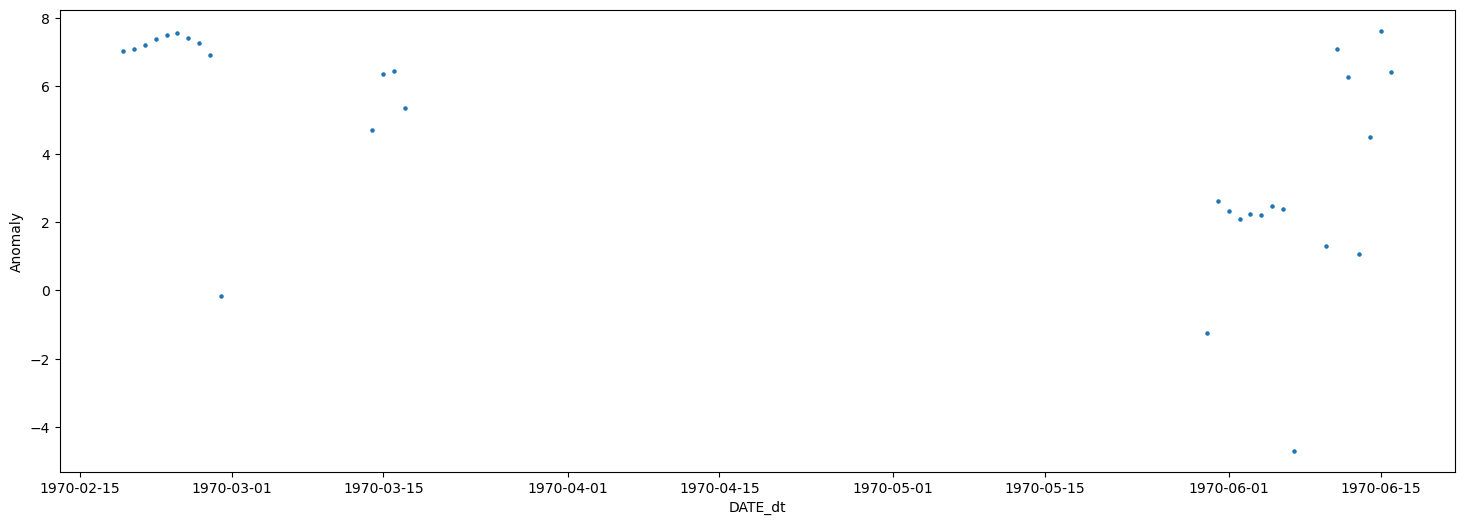

In [23]:
#试一下日期之间的差值点是否连续
Storms_WEP_DAY_counts_full.head(30).plot(kind='scatter', x='DATE_dt',y='Anomaly',s = 5,figsize=(18, 6))
plt.show()

依旧不连续

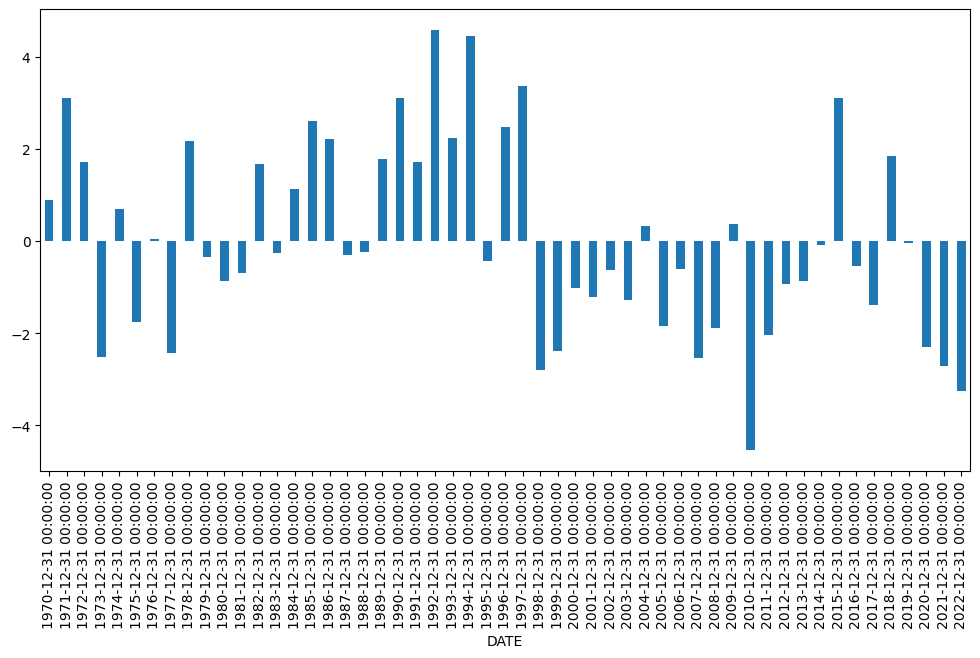

In [27]:
#3.10 resample
# NOTE: 不连续的日期可能是缺少观测或者其他原因导致的数据缺失，如果直接将计数点置为0，则表明该日期没有风暴，似乎并不严谨
#之前的题目里面发现日期是不连续的，但这些不连续的日期里，计数点不应该是“无”，而应该是“0”，这小题里面需要考虑到这些计数点

# NOTE: 注意先导入datetime模块 -1
from datetime import datetime

#创建一个count全为0的表格，但日期完全的表格
start_date = datetime(1970, 2, 19)
end_date = datetime(2022, 10, 22)
date_range = pd.date_range(start=start_date, end=end_date)
Storms_WEP_DAY_counts_zero = pd.DataFrame()
Storms_WEP_DAY_counts_zero['DATE'] = date_range
Storms_WEP_DAY_counts_zero['YEAR'] = Storms_WEP_DAY_counts_zero['DATE'].dt.year
Storms_WEP_DAY_counts_zero['MON'] = Storms_WEP_DAY_counts_zero['DATE'].dt.month
Storms_WEP_DAY_counts_zero['DAY'] = Storms_WEP_DAY_counts_zero['DATE'].dt.day
Storms_WEP_DAY_counts_zero['Count'] = 0
#Storms_WEP_DAY_counts_zero.head()

#将表格合并，使得没有计数点存在的日期计数点表示为0
Storms_WEP_DAY_counts['DATE'] = pd.to_datetime(Storms_WEP_DAY_counts['DATE'])
Storms_WEP_DAY_counts['YEAR'] = Storms_WEP_DAY_counts['YEAR'].astype(int)
merged_Storms_WEP_DAY_counts_full = pd.merge(Storms_WEP_DAY_counts_zero, Storms_WEP_DAY_counts, on='DATE', how='outer',suffixes=('_1', '_2'))
merged_Storms_WEP_DAY_counts_full['Count'] = merged_Storms_WEP_DAY_counts_full['Count_2'].combine_first(merged_Storms_WEP_DAY_counts_full['Count_1'])

#简化表格
merged_Storms_WEP_DAY_counts_full_sim = merged_Storms_WEP_DAY_counts_full.copy()
merged_Storms_WEP_DAY_counts_full_sim.drop(['Count_1','YEAR_2', 'MON_2','DAY_2','Count_2','DATE_dt'], axis=1,inplace=True)
merged_Storms_WEP_DAY_counts_full_sim.loc[:, 'DOY'] = merged_Storms_WEP_DAY_counts_full_sim['DATE'].dt.dayofyear
#merged_Storms_WEP_DAY_counts_full_sim.head(30)

#将表格合并，在原有表格基础上根据DOY添加计数点平均值
merged_WEP_counts_full_year = pd.merge(merged_Storms_WEP_DAY_counts_full_sim, Storms_WEP_DOY_counts_avg, left_on='DOY', right_on='DOY', how='left')
merged_WEP_counts_full_year.drop(['Count_y'], axis=1,inplace=True)
merged_WEP_counts_full_year.loc[:, 'Anomaly'] = merged_WEP_counts_full_year['Count_x'] - merged_WEP_counts_full_year['AVG']
#merged_WEP_counts_full_year.tail(30)

#resample，从日到年，作图
merged_WEP_counts_full_year_dtindex = merged_WEP_counts_full_year.copy()
merged_WEP_counts_full_year_dtindex.set_index(merged_WEP_counts_full_year['DATE'], inplace=True)
yearly_mean = merged_WEP_counts_full_year_dtindex['Anomaly'].resample('YE').mean()
#print(yearly_mean)
yearly_mean.plot(kind='bar',figsize=(12, 6))
plt.show()

将0纳入考量后发现，飓风活动较为活跃的时期聚集在20世纪90年代，具体较突出的年份为1994年。

In [28]:
#4.1 读取数据
#抓取的数据是txt格式的，列与列之间分隔符是数量不等的空格，且前面有一串readme，读取的时候注意
CFC_12 = pd.read_csv('AGAGE-GCMD_CGO_cfc-12.txt', delimiter='\\s+', skiprows=range(0, 16), engine='python')
#数据清洗，洗掉空值
CFC_12 = CFC_12.loc[(CFC_12['flag'] != '-')]
CFC_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308074 entries, 0 to 329113
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           308074 non-null  float64
 1   DD             308074 non-null  int64  
 2   MM             308074 non-null  int64  
 3   YYYY           308074 non-null  int64  
 4   hh             308074 non-null  int64  
 5   mm             308074 non-null  int64  
 6   mole_fraction  308074 non-null  float64
 7   repeability    308074 non-null  float64
 8   flag           308074 non-null  object 
dtypes: float64(3), int64(5), object(1)
memory usage: 23.5+ MB


这里使用的数据来源于这个网址：https://agage2.eas.gatech.edu/data_archive/agage/gc-md/event/capegrim/ascii/AGAGE-GCMD_CGO_cfc-12.txt。

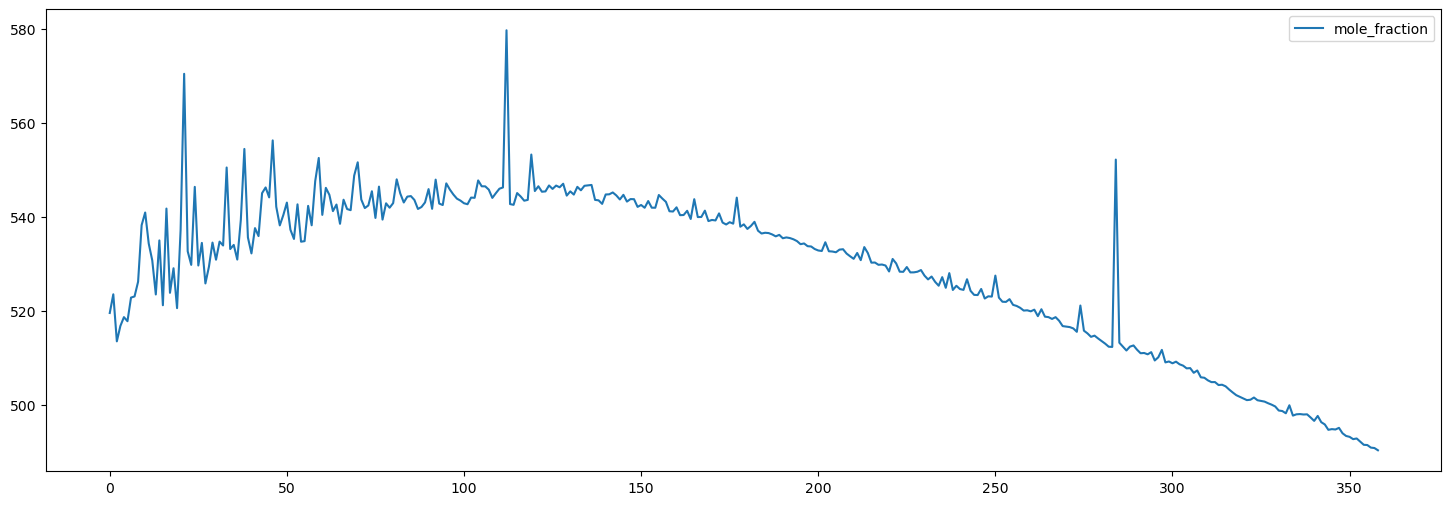

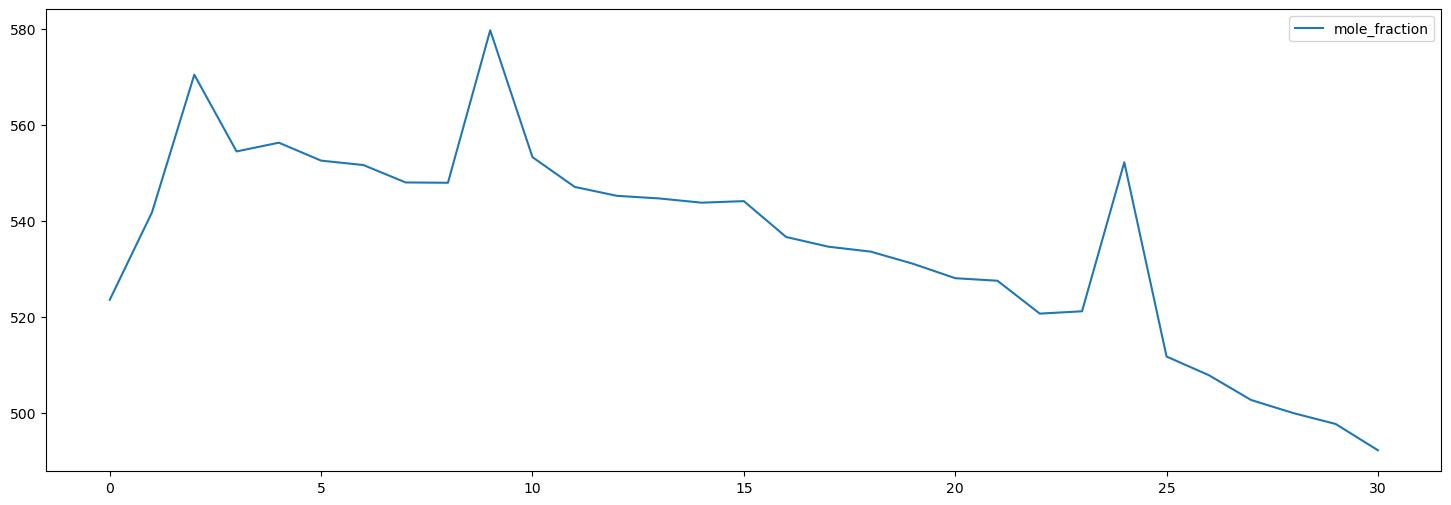

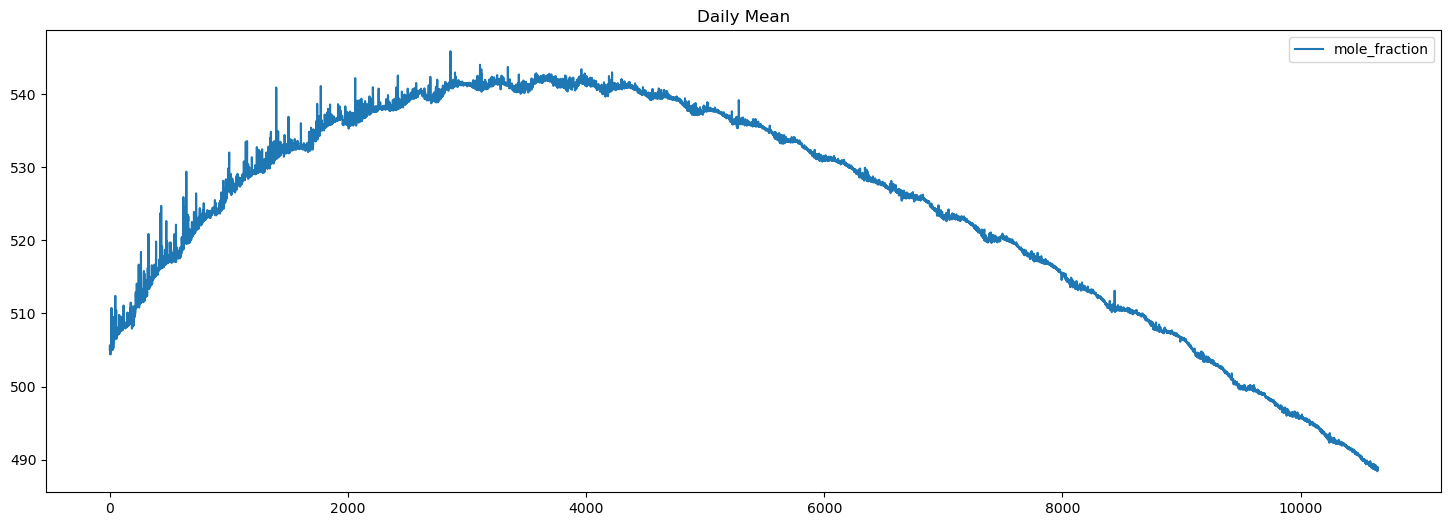

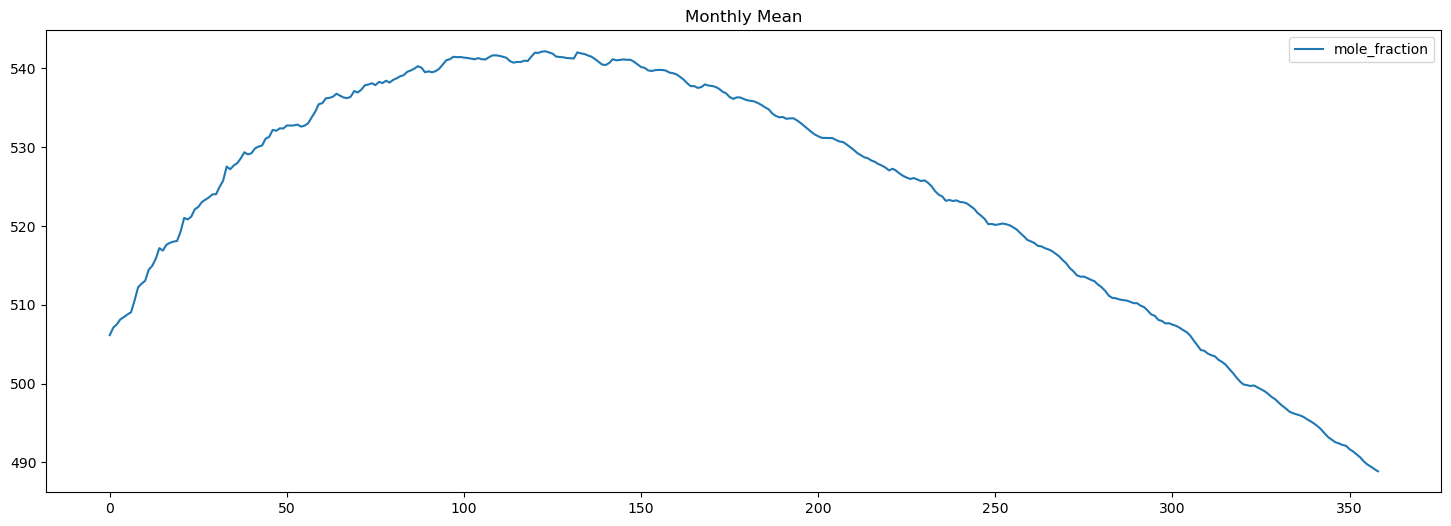

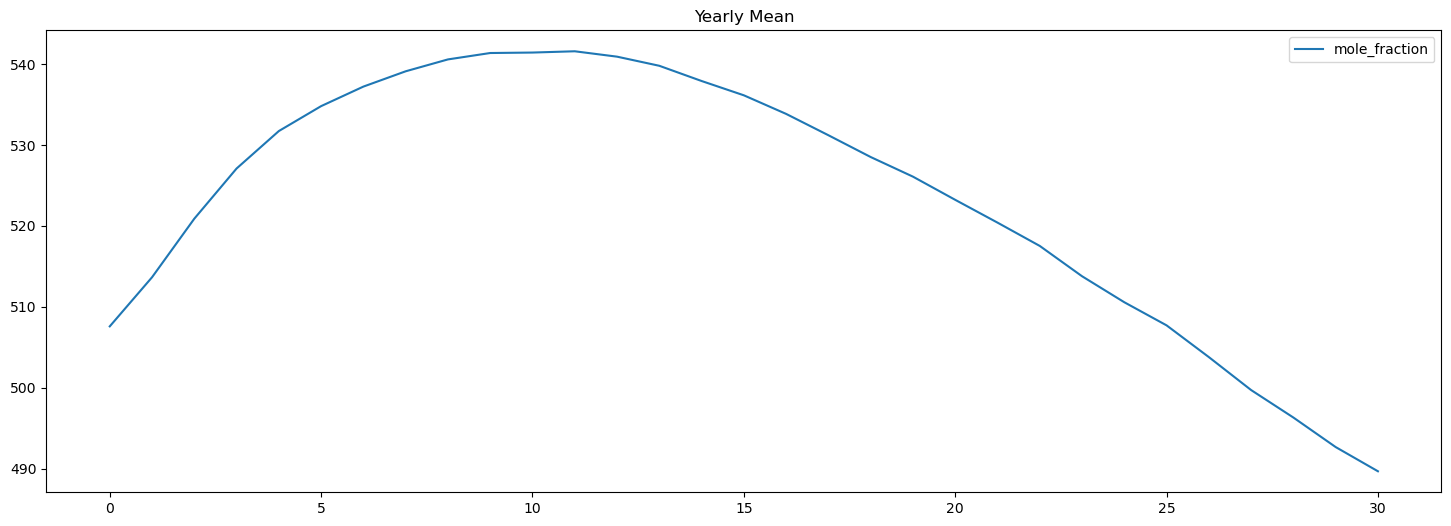

In [33]:
#4.2 计算每天、每月、每年的平均值，按时间序列作图
CFC_12_daily = CFC_12.groupby(['YYYY', 'MM','DD'])['mole_fraction'].mean().reset_index()
CFC_12_monthly = CFC_12.groupby(['YYYY', 'MM'])['mole_fraction'].mean().reset_index()
CFC_12_yearly = CFC_12.groupby(['YYYY'])['mole_fraction'].mean().reset_index()
#print(CFC_12_monthly)

CFC_12_daily.plot(kind='line',y='mole_fraction',figsize=(18, 6))
plt.title('Daily Mean')
plt.show()

CFC_12_monthly.plot(kind='line',y='mole_fraction',figsize=(18, 6))
plt.title('Monthly Mean')
plt.show()

CFC_12_yearly.plot(kind='line',y='mole_fraction',figsize=(18, 6))
plt.title('Yearly Mean')
plt.show()

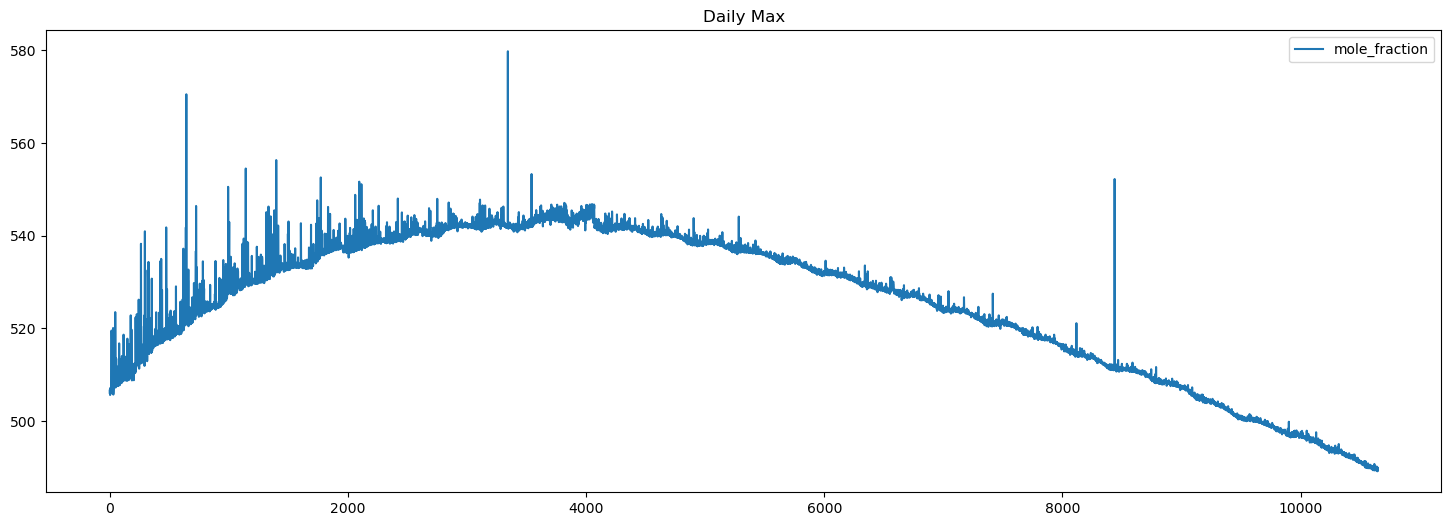

In [34]:
#4.3.1 提取每天的最大值，按时间序列作图
CFC_12_daily_max = CFC_12.groupby(['YYYY', 'MM','DD'])['mole_fraction'].max().reset_index()
#print(CFC_12_daily_max)
CFC_12_daily_max.plot(kind='line',y='mole_fraction',figsize=(18, 6))
plt.title('Daily Max')
plt.show()

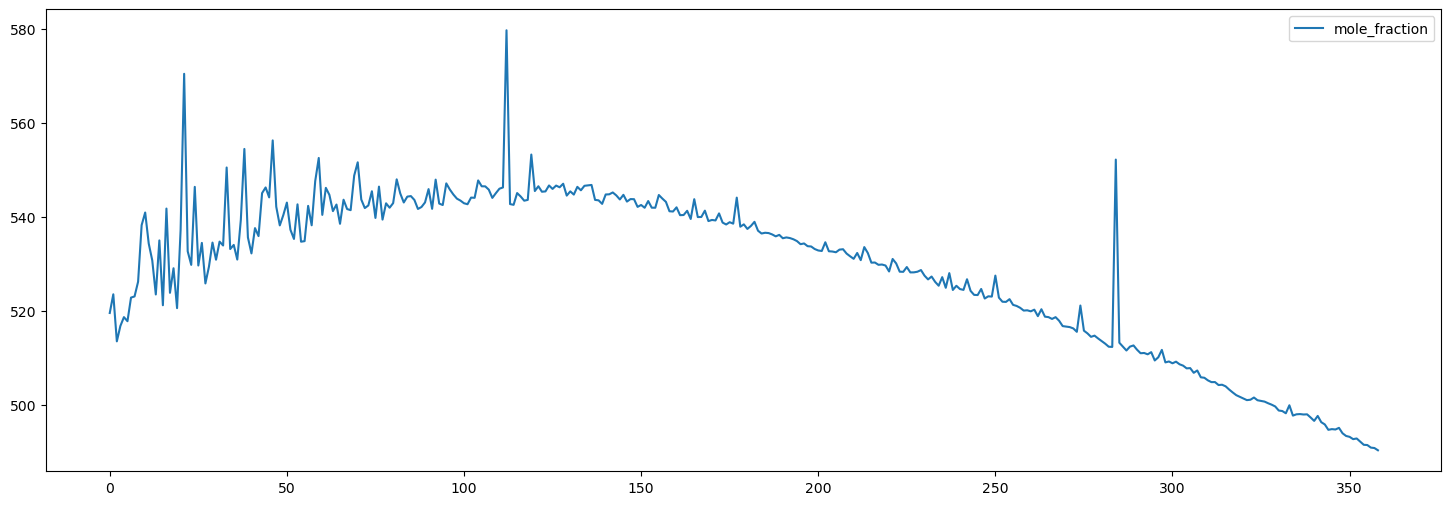

In [35]:
#4.3.2 提取每月的最大值，按时间序列作图
CFC_12_monthly_max = CFC_12.groupby(['YYYY', 'MM'])['mole_fraction'].max().reset_index()
#print(CFC_12_monthly_max)
CFC_12_monthly_max.plot(kind='line',y='mole_fraction',figsize=(18, 6))
plt.show()

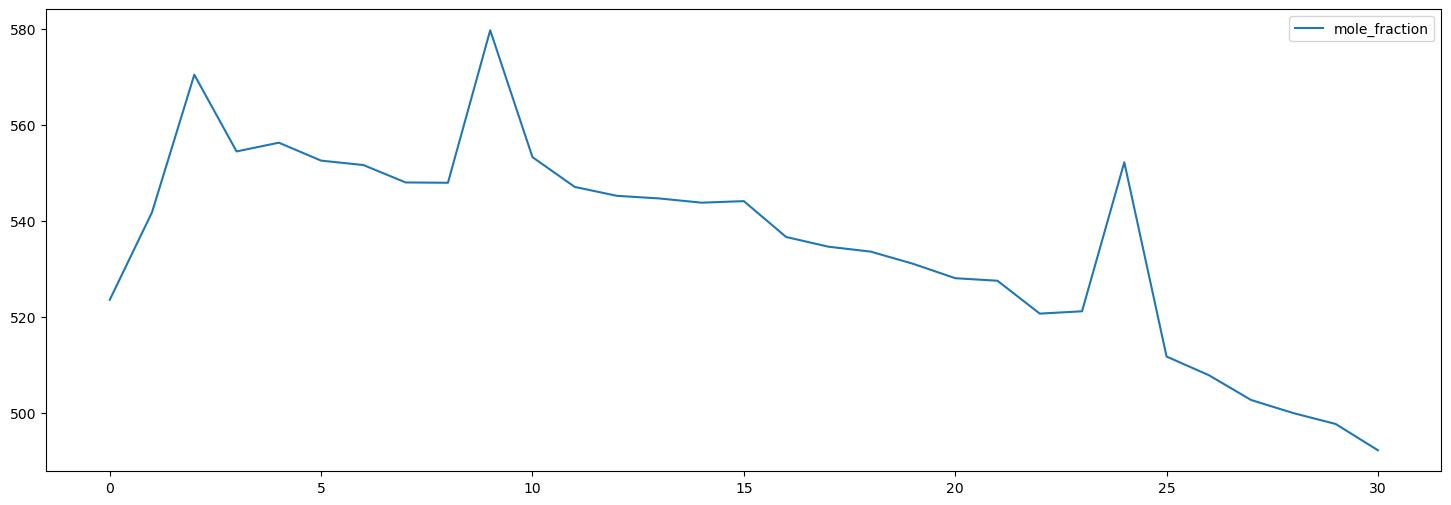

In [36]:
#4.3.3 提取每年的最大值，按时间序列作图
CFC_12_yearly_max = CFC_12.groupby(['YYYY'])['mole_fraction'].max().reset_index()
#print(CFC_12_monthly_max)
CFC_12_yearly_max.plot(kind='line',y='mole_fraction',figsize=(18, 6))
plt.show()

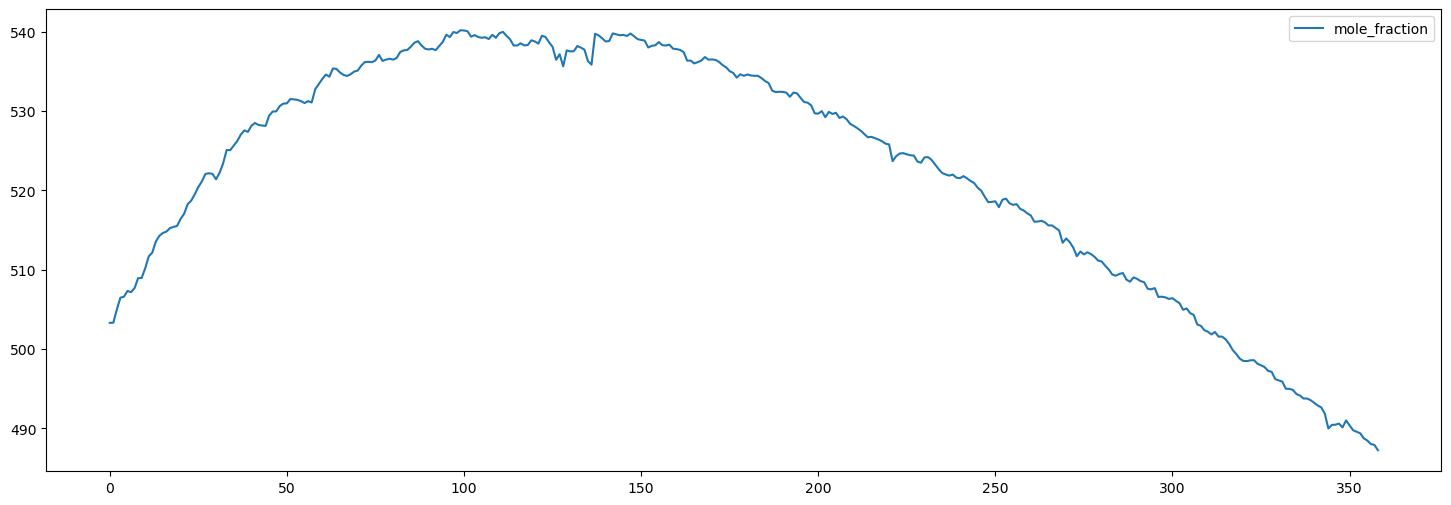

In [37]:
#4.3.4 提取每月的最小值，按时间序列作图
CFC_12_monthly_min = CFC_12.groupby(['YYYY', 'MM'])['mole_fraction'].min().reset_index()
#print(CFC_12_monthly_min)
CFC_12_monthly_min.plot(kind='line',y='mole_fraction',figsize=(18, 6))
plt.show()

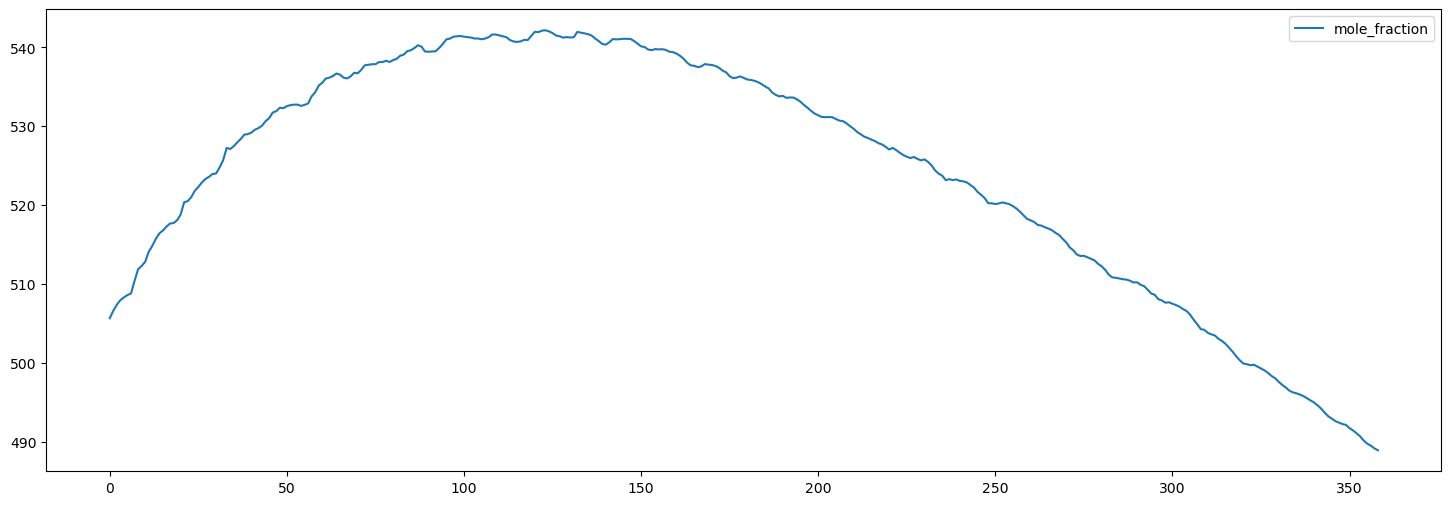

In [38]:
#4.3.5 提取每月的中位数，按时间序列作图
CFC_12_monthly_median = CFC_12.groupby(['YYYY', 'MM'])['mole_fraction'].median().reset_index()
#print(CFC_12_monthly_min)
CFC_12_monthly_median.plot(kind='line',y='mole_fraction',figsize=(18, 6))
plt.show()

画了五张图，分别采用了不同的时间序列和不同的数值。
每一张图都呈现出了先上升再下降的趋势，只是曲线的平滑程度有区别。
在不同三个时间尺度的比较中，平均值曲线反映出的趋势的平滑程度呈现出年>月>日的规律，而峰值曲线呈现出日>月>年的规律。
而在相同时间尺度下，曲线的平滑程度呈现出中位数>最小值>最大值的规律。